<a href="https://colab.research.google.com/github/yurityger/ma_sales/blob/main/python_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
from typing_extensions import final
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Mate_Courses/Pandas/Panda_files_ma/Final

# Uploading dataset
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv(
    'countries.csv',
    keep_default_na=False,  # Не трактувати "NA" як пропуск
    na_values=['', 'null', 'NaN']  # Вказати інші символи, які вважаються пропусками
) # додали параметр, щоб в стрічці Namibia значення alhfa-2 Na не рахувалось, як пусте
countries.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_Courses/Pandas/Panda_files_ma/Final


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
5,Andorra,AD,AND,Europe,Southern Europe
6,Angola,AO,AGO,Africa,Sub-Saharan Africa
7,Anguilla,AI,AIA,Americas,Latin America and the Caribbean
8,Antarctica,AQ,ATA,NaN,NaN
9,Antigua and Barbuda,AG,ATG,Americas,Latin America and the Caribbean


In [3]:
print(countries.shape)

(249, 5)


### **1. Data overview. Розуміння даних та їх змісту.**

  Датасет включає в себе 3 таблиці: Sales, Product та Countries.
  Sales поєднуються з Product через ID продукта, а з Countries через індекс країни (alpha-3)
  * Таблиця Sales включає в себе інформацію про кожне замовлення. Складається з колонок: Order ID,	Order Date,	Ship Date,	Order Priority,	Country Code,	Product, ID	Sales, Channel,	Units Sold,	Unit Price та Unit Cost. Розмір 1330 строк та 10 столбців;
  * Таблиця продукт складається з двох колонок: ID продукта та його тип (item_type), загальний вміст 12 строк;
  * Таблиця Countries складаєтьзя з інформації про країни: Ім'я, Індекси (alpha-2	alpha-3), континент (Region) та Суб-континент. 249 строк.

### **2. Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.**

In [4]:
# Подивимось, чи є пропущені значення у кожній таблиці, оцінимо їх долю, спробуй зрозуміти причини їх виникнення.
# print(events.isna().sum())
# print(products.isna().sum())
# print(countries.isna().sum())
# Events: 82 пропуска в Country Code, 2 в Unit Sold
# Products: без пропусків
# Countries: по 1 пропуску в колонках alpfa-2, region, sub-region

In [5]:
# Підрахуємо відсоток пропусків
# print(events.isna().sum() / events.shape[0] * 100)

In [6]:
# В таблиці Countries пропуски є лише для Антарктики, тому ми можем пропущені значення замінити на Антарктиду
countries.fillna("Antarctica", inplace=True)
# print(countries.isna().sum())

In [7]:
# У випадку з таблицею Events, пропуски країн складають більше 6% від повної інформації, тому ми не можемо їх видалити.
# У цьому випадку, для збереження статистики, я б запропонував замінити їх на країну, де відсутні продажі. Наприклад на Антарктику.
events.fillna({"Country Code": "ATA"}, inplace=True)
# print(events.isna().sum())

In [8]:
# Пропуски Units Sold складають 0.15 %, тому ми їх можемо просто видалити
events.dropna(subset=["Units Sold"], inplace=True)
# print(events.isna().sum())

In [9]:
# Перевіримо наявність дублікатів значень
duplicate_rows = products.duplicated()
# print(duplicate_rows)
# print(duplicate_rows.sum())
# Відсутні

In [10]:
# Перевіримо типи даних усіх колонок
# events.info()
# В таблиці Sales колонки Order Date та Ship Date потребують зміни типа даних с object на date
events["Ship Date"] = pd.to_datetime(events["Ship Date"], format="%m/%d/%Y")
events["Order Date"] = pd.to_datetime(events["Order Date"], format="%m/%d/%Y")
# events.info()


In [11]:
# Перевіримо наявність аномалій в даних
# print(events.describe())
# Не виявлено

### **3. Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.**

In [12]:
# Поєднаємо всі 3 таблиці в одну та видалемо непотрібні колонки
events_products = pd.merge(events, products, left_on="Product ID", right_on="id", how="left")
final_table = pd.merge(events_products, countries, left_on="Country Code", right_on="alpha-3", how="left")
final_table = final_table.drop(columns=["alpha-3", "id"])
final_table.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,ATA,7940,Online,4693.0,668.27,502.54,Household,Antarctica,AQ,Antarctica,Antarctica
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [13]:
# приведемо назви до єдиного типу
final_table.columns = final_table.columns.str.lower().str.replace(" ", "-", regex=True)
final_table.columns = final_table.columns.str.lower().str.replace("_", "-", regex=True)
print(final_table.columns)

Index(['order-id', 'order-date', 'ship-date', 'order-priority', 'country-code',
       'product-id', 'sales-channel', 'units-sold', 'unit-price', 'unit-cost',
       'item-type', 'name', 'alpha-2', 'region', 'sub-region'],
      dtype='object')


##### Розрахунок ключових метрик

In [14]:
# додамо два рядки, щоб підрахувати дохід та продаж кожного замовлення
final_table["order-revenue"] = final_table["units-sold"] * final_table["unit-price"]
final_table["order-profit"] = final_table["units-sold"] * (final_table["unit-price"] - final_table["unit-cost"])
# Загальна сумма продажів
total_revenue = (final_table["order-revenue"]).sum()
# Загальний дохід
total_profit = (final_table["order-profit"]).sum()
# Кількість замовлень
order_count = final_table["order-id"].nunique()
# Рахуємл країни замовлень
country_count = final_table["name"].nunique()
# Кількість груп товарів
product_count = final_table["item-type"].nunique()
print(f"Сумма продажів складає {total_revenue:,} $")
print(f"Загальний прибуток: {total_profit:,} $")
print(f"Кількість замовлень складає {order_count} шт.")
print(f"Товари реалізуються в {country_count} країнах")
print(f"Продажі представляють {product_count} груп товарів")


Сумма продажів складає 1,702,129,408.21 $
Загальний прибуток: 501,434,459.0 $
Кількість замовлень складає 1328 шт.
Товари реалізуються в 46 країнах
Продажі представляють 12 груп товарів


#### Проаналізуємо продажі (доходи, витрати, прибутки, популярність товарів) та зробимо відповідні візуалізації
* в розрізі категорій товарів

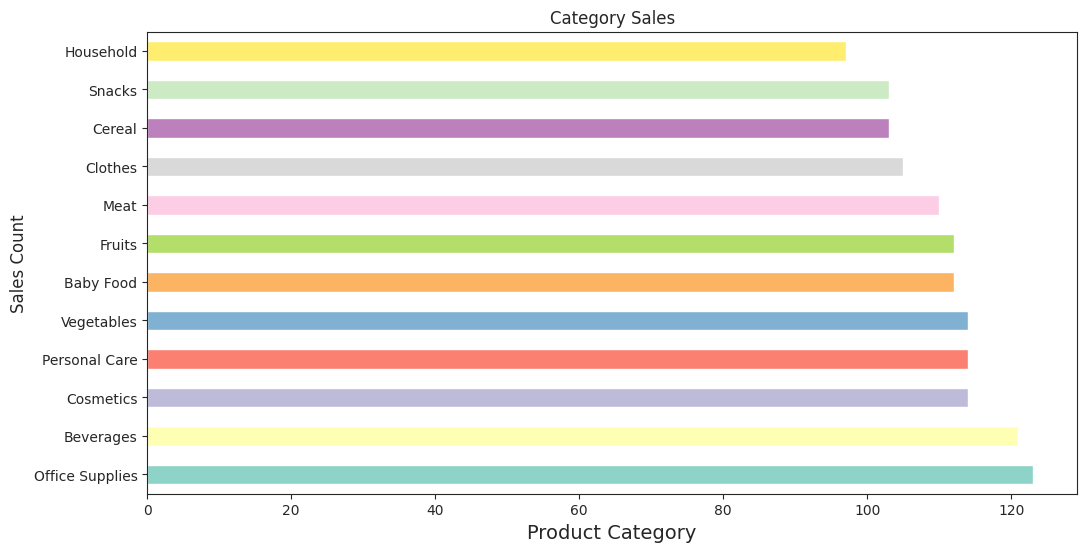

In [15]:
# Відсортуємо категорії товарів за кількостю продажів
category_counts = final_table.groupby("item-type").size().sort_values(ascending=False)

sns.set_style("ticks")

category_counts.plot(kind="barh", stacked=True, figsize=(12, 6), color=sns.color_palette("Set3", len(category_counts)))

plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Sales Count", fontsize=12)
plt.title("Category Sales")
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Show the plot
plt.show()


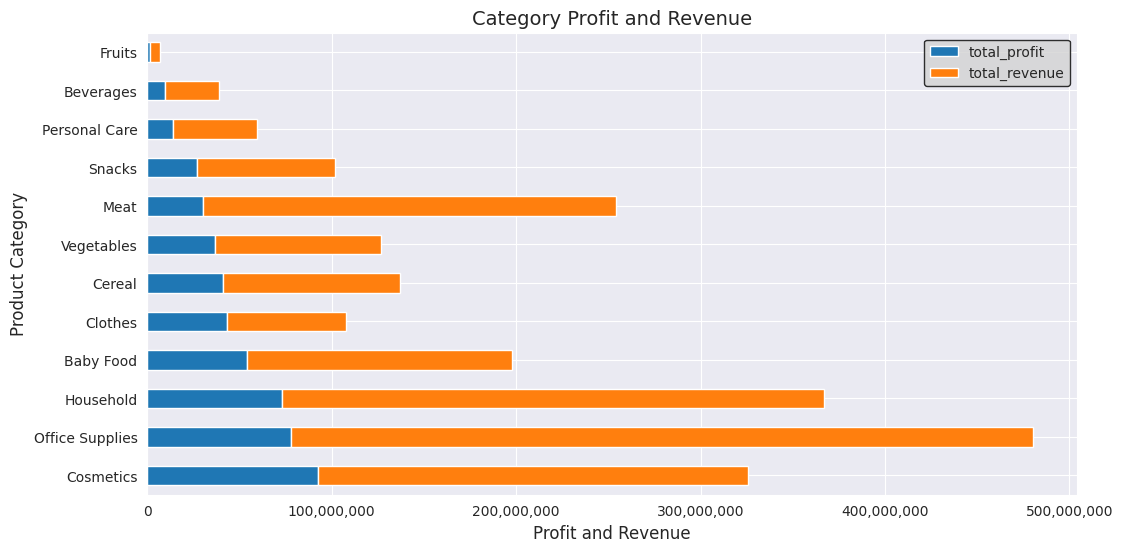

In [16]:
# Відсортуємо категорії товарів за прибутком

category_profit = final_table.groupby("item-type").agg(
    total_profit=("order-profit", "sum"),
    total_revenue=("order-revenue", "sum")
).reset_index()

category_profit_sorted = category_profit.sort_values(by="total_profit", ascending=False)

# Побудова графіку
sns.set_style("darkgrid")

category_profit_sorted.set_index("item-type").plot(kind="barh", stacked=True, figsize=(12, 6))

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Profit and Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Category Profit and Revenue", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.legend(
    fontsize=10,
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

legend = plt.gca().legend()
legend.get_frame().set_facecolor('lightgray')
legend.get_frame().set_edgecolor('black')

plt.show()

* в розрізі географії

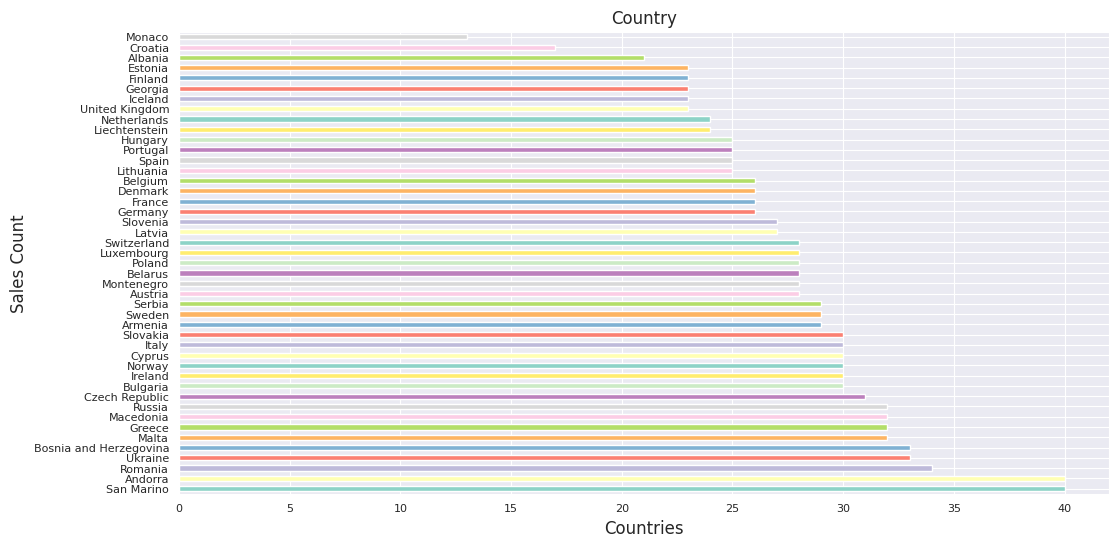

In [17]:
# Для покращення аналітики краін і регіонів, видалемо всі рядки, де не було визначено країну при замовленні
final_clear_table = final_table[final_table["country-code"] != "ATA"]

# Відсортуємо країни за кількостю продажів
countries_count = final_clear_table.groupby("name").size().sort_values(ascending=False)


# Побудова графіку
countries_count.plot(kind="barh", stacked=True, figsize=(12, 6), color=sns.color_palette("Set3", len(category_counts)))

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Sales Count", fontsize=12)
plt.title("Country")
# plt.legend(title="Gender", loc="upper right")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

# Show the plot
plt.show()

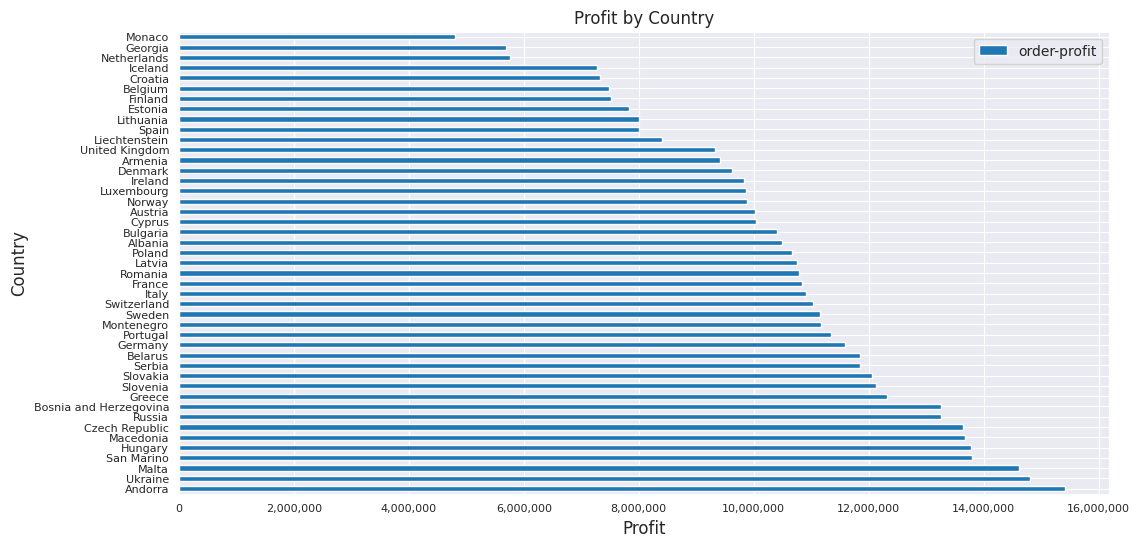

In [18]:
# Відсортуємо країни за прибутком

countries_profit = final_clear_table.groupby("name")["order-profit"].sum().reset_index()
countries_profit_sorted = countries_profit.sort_values(by="order-profit", ascending=False)

# Побудова графіку
countries_profit_sorted.set_index("name").plot(kind="barh", stacked=True, figsize=(12, 6))

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Profit", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Profit by Country")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.show()

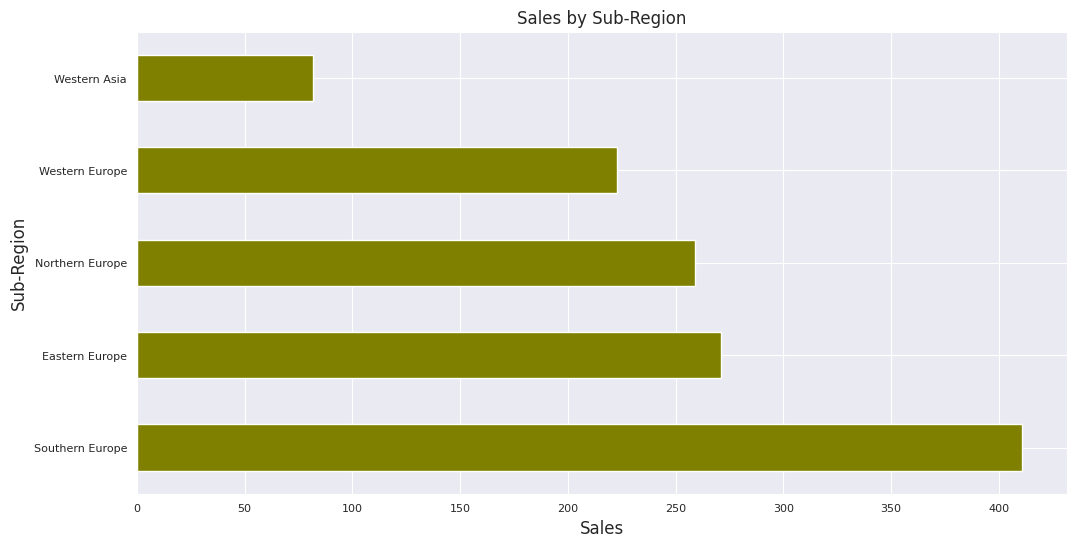

In [19]:
# Відсортуємо регіони за кількостю продажів
sub_region_count = final_clear_table.groupby("sub-region").size().sort_values(ascending=False)

# Побудова графіку
sub_region_count.plot(kind="barh", stacked=True, figsize=(12, 6), color="olive")

plt.xlabel("Sales", fontsize=12)
plt.ylabel("Sub-Region", fontsize=12)
plt.title("Sales by Sub-Region")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.show()

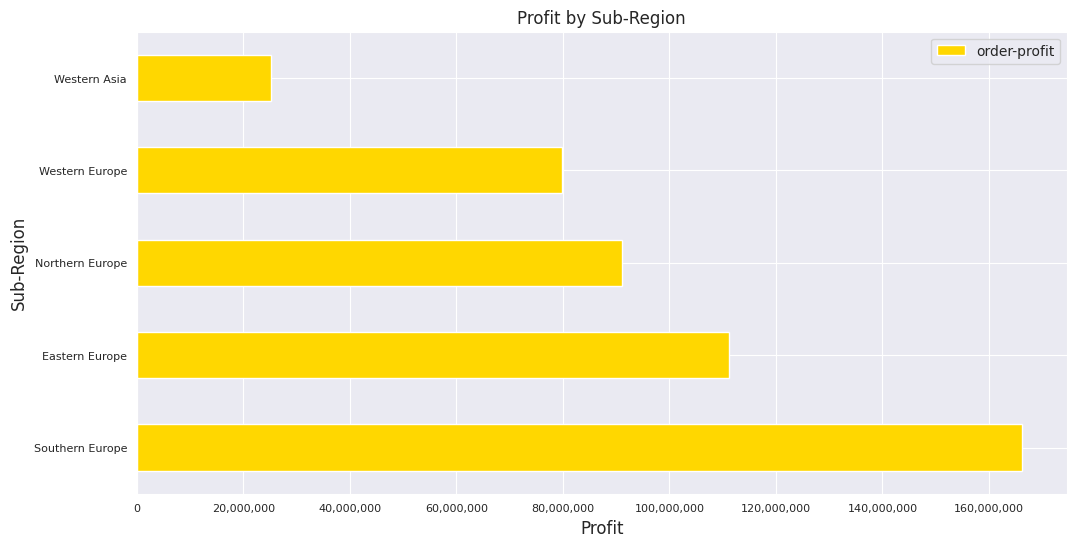

In [20]:
# Відсортуємо регіони за прибутком

region_profit = final_clear_table.groupby("sub-region")["order-profit"].sum().reset_index()
region_profit_sorted = region_profit.sort_values(by="order-profit", ascending=False)

# Побудова графіку
region_profit_sorted.set_index("sub-region").plot(kind="barh", stacked=True, figsize=(12, 6), color="gold")

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Profit", fontsize=12)
plt.ylabel("Sub-Region", fontsize=12)
plt.title("Profit by Sub-Region")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

#### Проаналізуємо, чи залежить прибуток від часу, необхідного на відвантаження товару. Зробимо потрібні для цього агрегування та візуалізації.

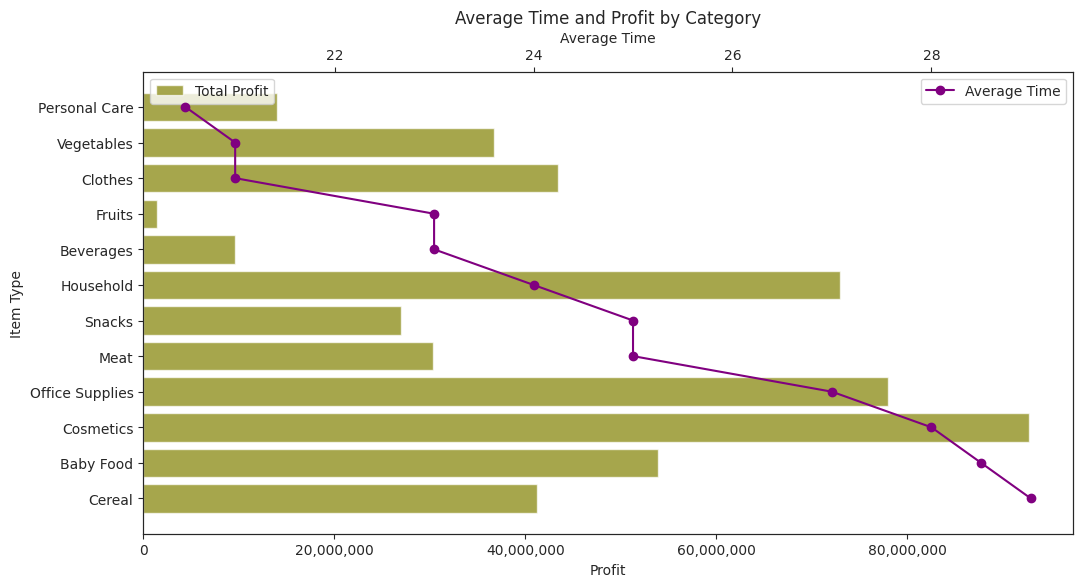

In [21]:
# Додамо колонку, яка буде рахувати різницю в днях від замовлення до доставки
final_table["road-time"] = final_table["ship-date"] - final_table["order-date"]
# Перетворюємо в кількість днів
final_table["road-time"] = final_table["road-time"].dt.days
# final_table.info()

# Побудуємо два графіки, перший буде відображати лідерів по продажам та швидкості доставки в розрізі регіонів
category_time = final_table.groupby("item-type").agg(
    total_profit=("order-profit", "sum"),
    total_time=("road-time", "median")
).reset_index()

category_time_sorted = category_time.sort_values(by="total_time", ascending=False)

# Діаграма з двома осями y
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Перша ось (profit)
ax1.barh(category_time_sorted["item-type"], category_time_sorted["total_profit"], color='olive', label="Total Profit", alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax1.set_xlabel("Profit")
ax1.set_ylabel("Item Type")
ax1.set_title("Average Time and Profit by Category")

# Додаємо другу ось (average_time)
ax2 = ax1.twiny()
ax2.plot(category_time_sorted["total_time"], category_time_sorted["item-type"], color='purple', marker='o', label="Average Time")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax2.set_xlabel("Average Time")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

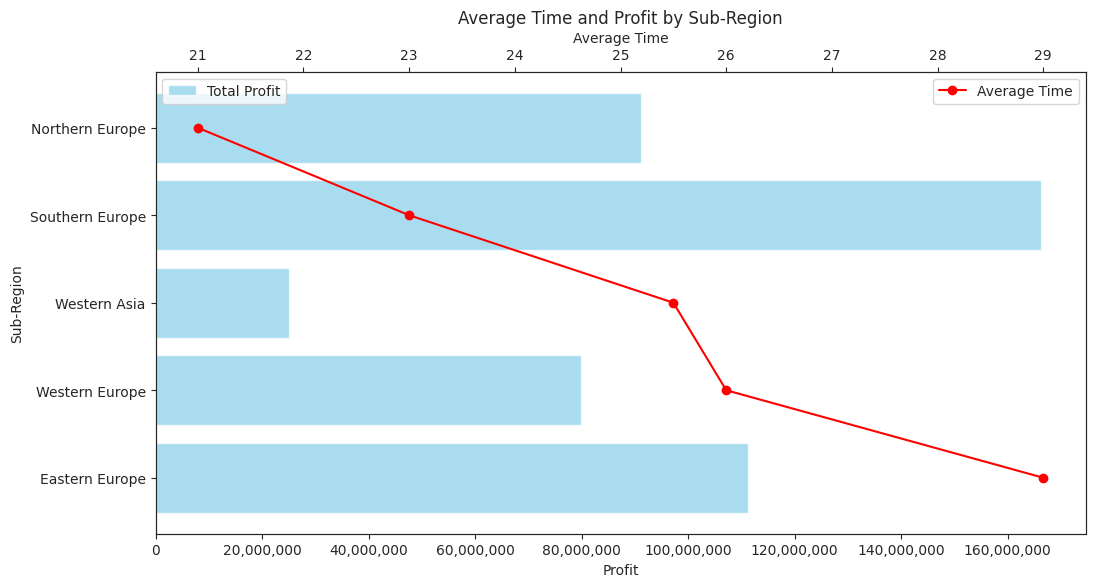

In [36]:
# Додамо колонку з різницею між датами без арктики
final_clear_table.loc[:, "road-time"] = (final_clear_table["ship-date"] - final_clear_table["order-date"]).dt.days



# Другий, в розрізі регіонів
region_time = final_clear_table.groupby("sub-region").agg(
    total_profit=("order-profit", "sum"),
    total_time=("road-time", "median")
).reset_index()

region_time_sorted = region_time.sort_values(by="total_time", ascending=False)

# Діаграма з двома осями
sns.set_style("ticks")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Перша ось (profit)
ax1.barh(region_time_sorted["sub-region"], region_time_sorted["total_profit"], color='skyblue', label="Total Profit", alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax1.set_xlabel("Profit")
ax1.set_ylabel("Sub-Region")
ax1.set_title("Average Time and Profit by Sub-Region")

# Додаємо другу ось (average_time)
ax2 = ax1.twiny()
ax2.plot(region_time_sorted["total_time"], region_time_sorted["sub-region"], color='red', marker='o', label="Average Time")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax2.set_xlabel("Average Time")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

*Судячи з даних ми не можемо спостерігати залежність продажів від швидкості відвантаження*

In [23]:
final_table.head(1)

,order-id,order-date,ship-date,order-priority,country-code,product-id,sales-channel,units-sold,unit-price,unit-cost,item-type,name,alpha-2,region,sub-region,order-revenue,order-profit,road-time
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.7,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.0,57583.5,10


#### Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

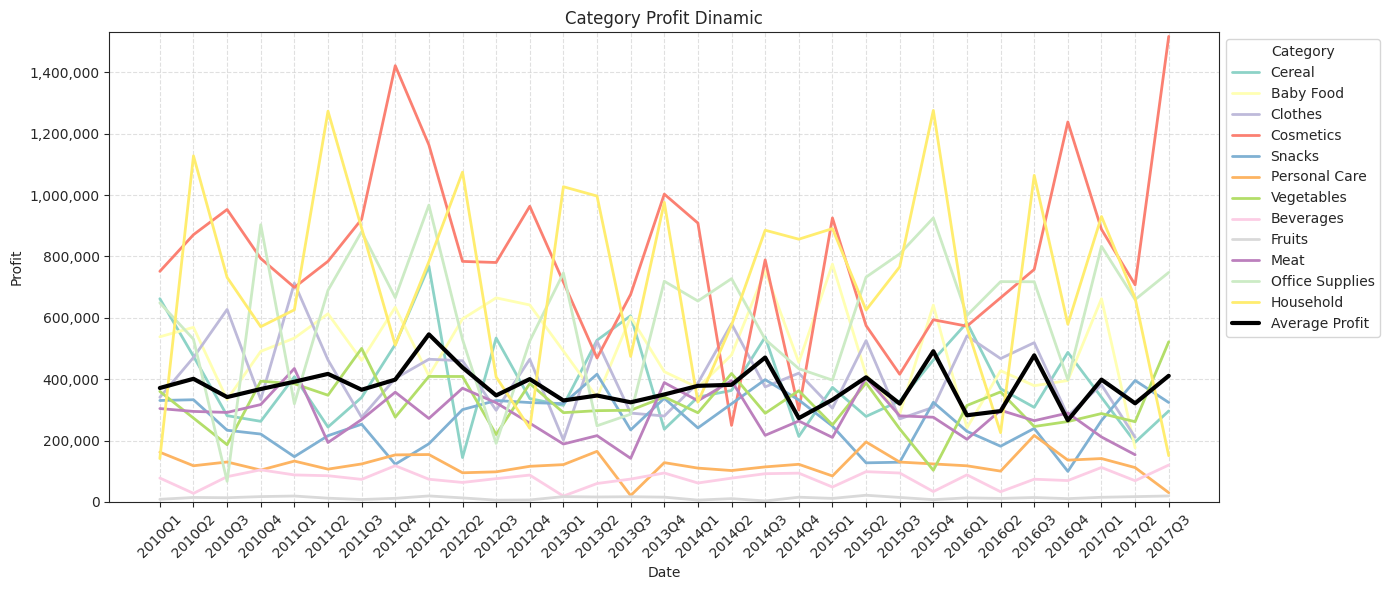

In [24]:
# Додамо колонку окремо з кварталом
final_table["short-date"] = final_table["order-date"].dt.to_period("Q").astype(str)

sort_date = final_table.sort_values("order-date")

# Обчислення середнього значення по кожному кварталу
avg_profit_per_quarter = sort_date.groupby("short-date")["order-profit"].mean().reset_index()

plt.figure(figsize=(14, 6))
#  Побудуємо графік доходу від категорій
sns.lineplot(
    x="short-date",
    y="order-profit",
    hue="item-type",
    data=sort_date,
    linewidth=2,
    errorbar=None,
    palette='Set3'
)

plt.plot(
    avg_profit_per_quarter["short-date"],
    avg_profit_per_quarter["order-profit"],
    color='black',
    linewidth=3,
    label='Average Profit'
)

plt.xticks(ticks=sort_date["short-date"].unique(), rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:,.0f}'))

sns.set_style("white")

plt.legend(
    title="Category",
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

plt.title("Category Profit Dinamic")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, sort_date['order-profit'].max() * 0.9)
plt.grid(visible=True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()



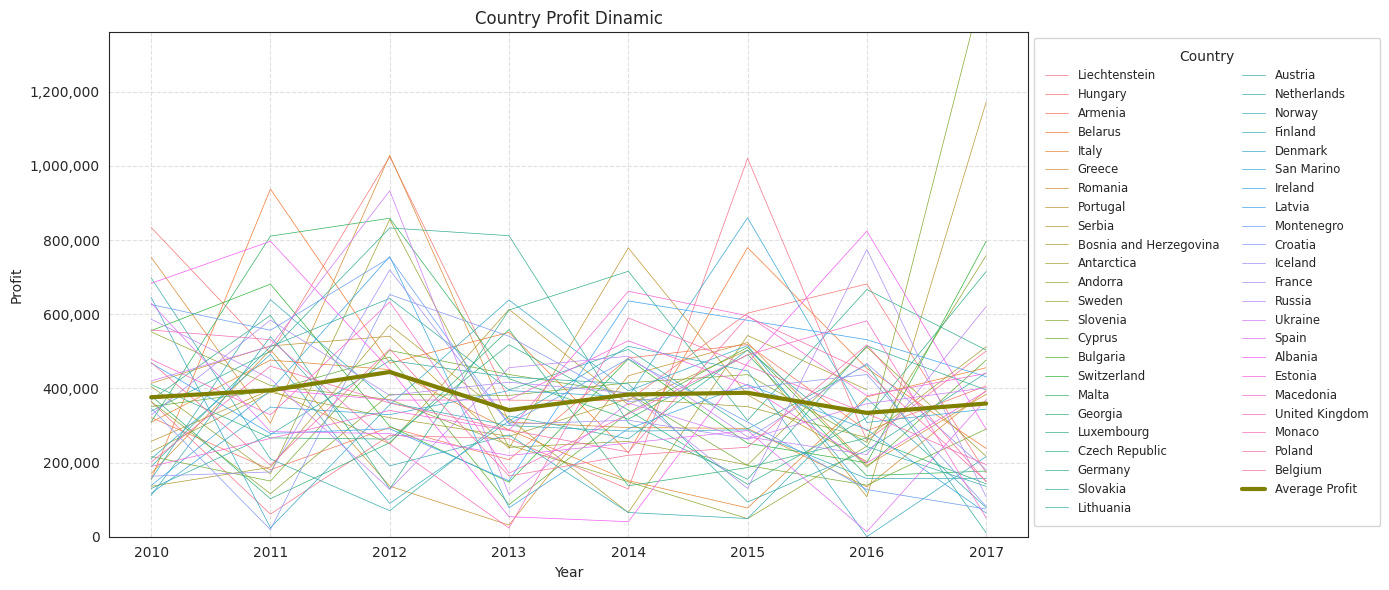

In [25]:
# Побудуємо графік доходу по країнам
sort_date["year"] = sort_date["order-date"].dt.to_period("Y").astype(str) # через велику кількість країн і даних, створимо колонку "рік"

# Видалимо замовлення з невизначенними країнами
clear_sort_table = sort_date[sort_date["country-code"] != "ATA"]

# Обчислення середнього значення по кожному року
avg_profit_per_year = clear_sort_table.groupby("year")["order-profit"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(
    x="year",
    y="order-profit",
    hue="name",
    data=sort_date,
    linewidth=0.5,
    errorbar=None
)

plt.plot(
    avg_profit_per_year["year"],
    avg_profit_per_year["order-profit"],
    color='olive',
    linewidth=3,
    label='Average Profit'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:,.0f}'))

sns.set_style("white")

plt.legend(
    title="Country",
    loc="upper left",
    bbox_to_anchor=(1, 1),
    fontsize='small',
    markerscale=0.7,
    ncol=2,
    borderpad=1
)

plt.title("Country Profit Dinamic")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.ylim(0, sort_date['order-profit'].max() * 0.8)


plt.tight_layout()
plt.show()

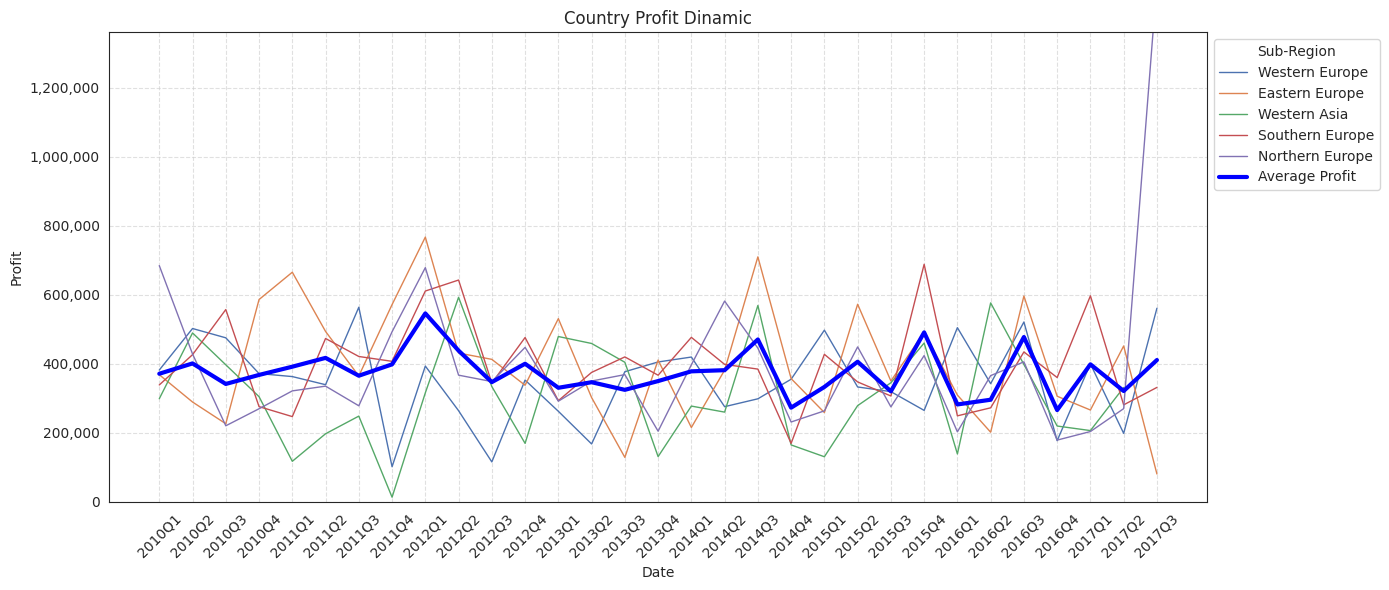

In [26]:
# Побудуємо графік доходу по регіонам
plt.figure(figsize=(14, 6))
sns.lineplot(
    x="short-date",
    y="order-profit",
    hue="sub-region",
    data=clear_sort_table,
    linewidth=1,
    errorbar=None,
    palette='deep'
)

plt.plot(
    avg_profit_per_quarter["short-date"],
    avg_profit_per_quarter["order-profit"],
    color='blue',
    linewidth=3,
    label='Average Profit'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:,.0f}'))

sns.set_style("white")

plt.legend(
    title="Sub-Region",
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

plt.title("Country Profit Dinamic")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.ylim(0, sort_date['order-profit'].max() * 0.8)

plt.tight_layout()
plt.show()

#### Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

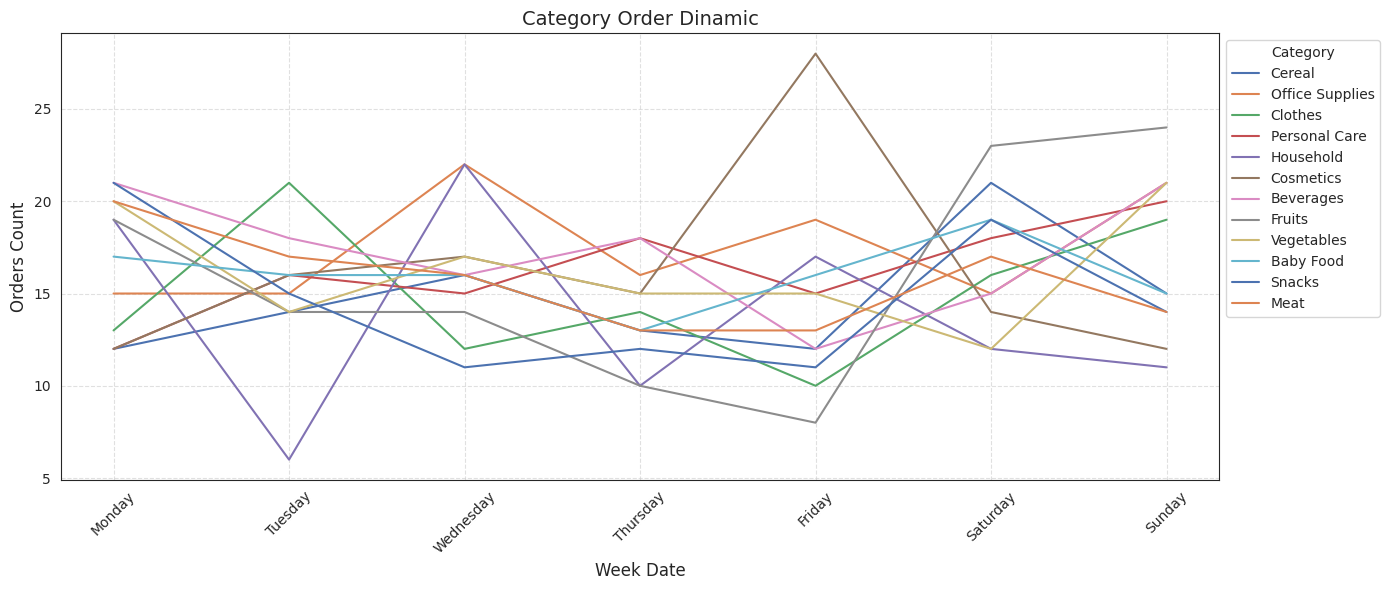

In [27]:
# додамо колонку, яка буде відображати день тижня
final_table["week-day"] = final_table["order-date"].dt.day_name()

# Обчислення середнього значення по кожному дню тижня
week_orders = final_table.groupby(["item-type","week-day"])["order-id"].size().reset_index(name="order_count")

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week_orders["week-day"] = pd.Categorical(week_orders["week-day"], categories=days_order, ordered=True)
sort_week_date = week_orders.sort_values("week-day")


plt.figure(figsize=(14, 6))
#  Побудуємо графік доходу від категорій
sns.lineplot(
    x="week-day",
    y="order_count",
    hue="item-type",
    data=sort_week_date,
    linewidth=1.5,
    errorbar=None,
    palette='deep'
)

plt.xticks(ticks=sort_week_date["week-day"].unique(), rotation=45)

sns.set_style("white")


plt.legend(
    title="Category",
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

plt.title("Category Order Dinamic", fontsize=14)
plt.xlabel("Week Date" , fontsize=12)
plt.ylabel("Orders Count" , fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


#### **Висновки**
*   Поступове зростання через два-три роки змінюється падінням, наразі орієнтовна середина дистанції зростання
*   Cosmetick, Office Supplies та Household найбільш прибуткові категорії.
*   Найкращі продажі Cosmetick приходяться на 4-ий квартал
*   Не можемо визначити сезонність товарів
*   Категорії харчових продуктів менш прибуткові, але найбільш стабільні
*   Четверг найменш прибутковий день. Найбільш: вихідні субота та неділя
*   Cosmetic єдина категорія, де пік продажів приходиться на п'ятницю
*   Для Household пік це середа, тако ж високі продажі в цей день помітні для Office Supplies
#### *В цілому зростання доходу в першу чергу відбувається завдяки категоріям Cosmetick, Office Supplies та Household. В той же час попит на продуктові товари незмінний і ці категорії можуть статит опорою для зберігання продажів в країнах, де є ризик кризових ситуацій.*


